In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import MeanIoU, AUC
from tensorflow.keras.applications.xception import preprocess_input

import warnings
warnings.filterwarnings("ignore")

In [2]:
DIR = 'Downloads/fishdirectory/Fish_Dataset/Fish_Dataset'
classes = [i for i in os.listdir(DIR) if '.' not in i]
classes

['Black Sea Sprat',
 'Gilt-Head Bream',
 'Hourse Mackerel',
 'Red Mullet',
 'Red Sea Bream',
 'Sea Bass',
 'Shrimp',
 'Striped Red Mullet',
 'Trout']

In [3]:
label = []
path = []

for dirname, _,filenames in os.walk(DIR):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':              
            if dirname.split()[-1]!='GT':                       
                label.append(os.path.split(dirname)[-1])         
                path.append(os.path.join(dirname,filename))     

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [4]:
df.head(10)

path            label
0  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Black Sea Sprat
1  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Black Sea Sprat
2  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Black Sea Sprat
3  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Black Sea Sprat
4  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Black Sea Sprat
5  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Black Sea Sprat
6  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Black Sea Sprat
7  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Black Sea Sprat
8  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Black Sea Sprat
9  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Black Sea Sprat

In [5]:
df.path[0]

'Downloads/fishdirectory/Fish_Dataset/Fish_Dataset\\Black Sea Sprat\\Black Sea Sprat\\00001.png'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [7]:
df['label'].value_counts()

label
Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: count, dtype: int64

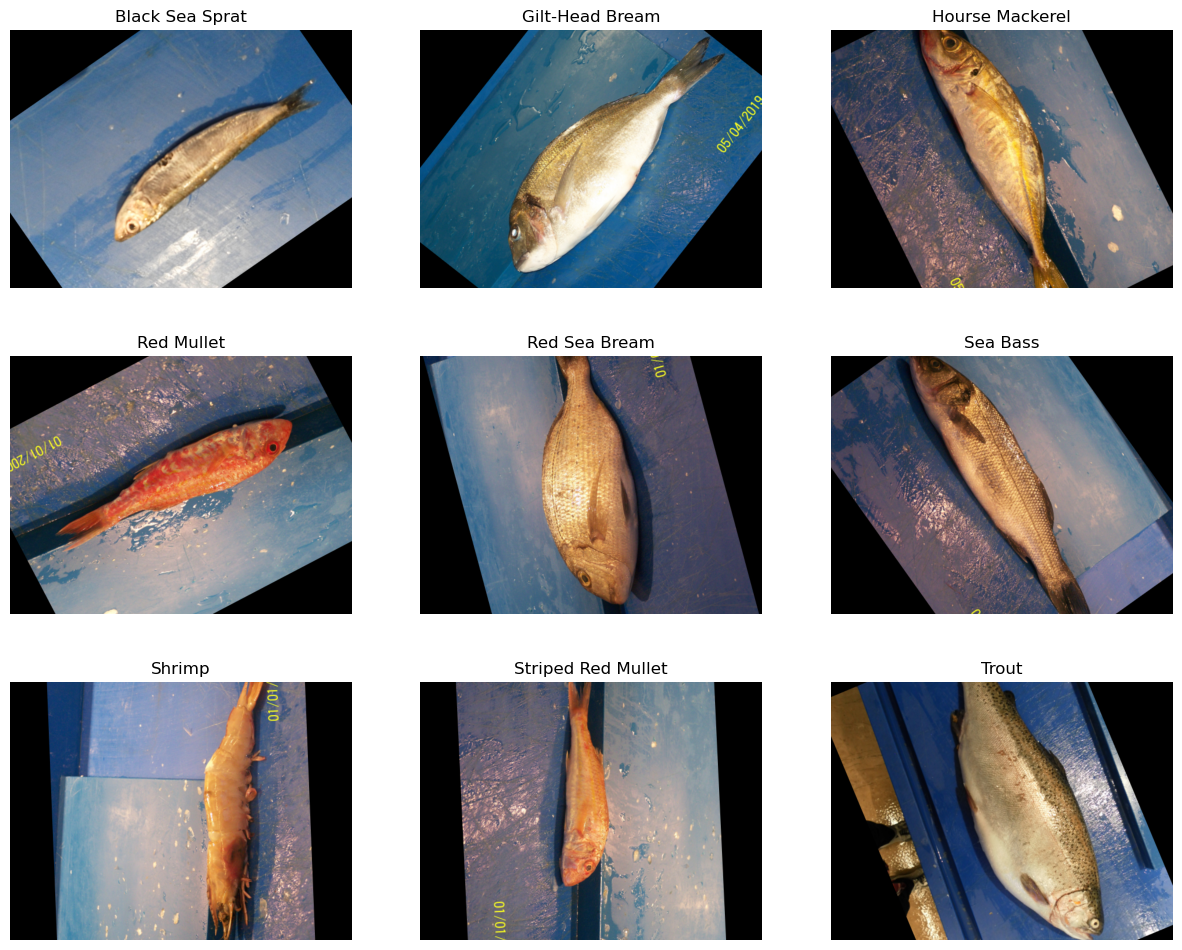

In [8]:
idx = 0
plt.figure(figsize=(15,12))
for unique_label in df['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

In [9]:
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [10]:
print(train_df.shape)
print(test_df.shape)

(7200, 2)
(1800, 2)


In [11]:
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False)

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [12]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


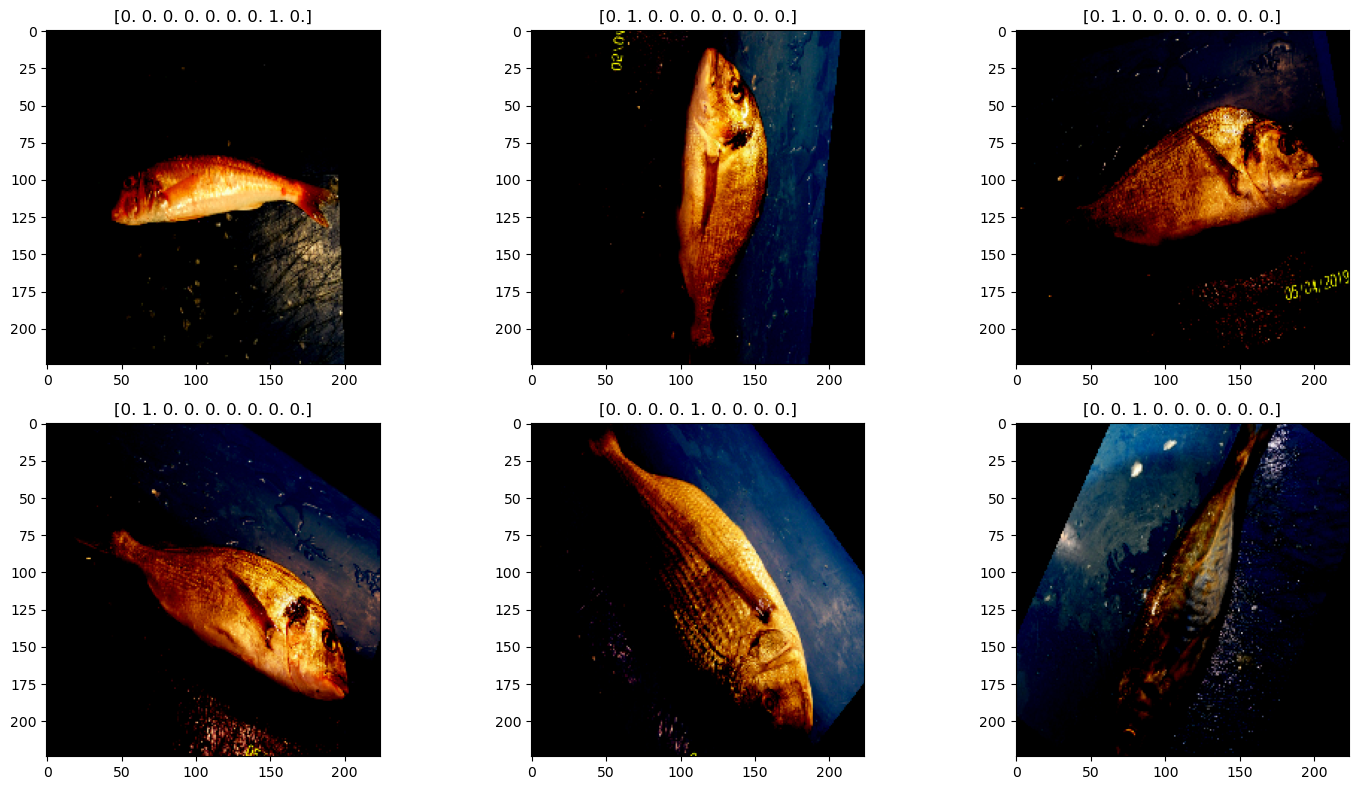

In [13]:
fit, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax = ax.flatten()
j = 0

# Loop to get the next batch of images from the test_images iterator
for _ in range(6):
    img, label = next(test_images)  # Use next() to get the batch
    ax[j].imshow(img[0])  # Display the first image in the batch
    ax[j].set_title(label[0])  # Set title to the first label in the batch
    j = j + 1

plt.tight_layout()
plt.show()


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Custom CNN Model
def create_custom_cnn(input_shape, num_classes):
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flattening the layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout to prevent overfitting
    model.add(Dense(128, activation='relu'))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [15]:
# Set input shape (224x224x3) and number of classes (9 in your case)
input_shape = (224, 224, 3)
num_classes = 9

# Create custom CNN modelS
model = create_custom_cnn(input_shape, num_classes)
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, validation_data=val_images, epochs=5)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,186,633 (42.67 MB)

 Trainable params: 11,186,633 (42.67 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 154s 844ms/step - accuracy: 0.2227 - loss: 2.1476 - val_accuracy: 0.6014 - val_loss: 1.1179
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 114s 632ms/step - accuracy: 0.5688 - loss: 1.1387 - val_accuracy: 0.8764 - val_loss: 0.4624
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 113s 630ms/step - accuracy: 0.7132 - loss: 0.7518 - val_accuracy: 0.9201 - val_loss: 0.3733
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 135s 751ms/step - accuracy: 0.7749 - loss: 0.5889 - val_accuracy: 0.9306 - val_loss: 0.2340
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 116s 644ms/step - accuracy: 0.8331 - loss: 0.4415 - val_accuracy: 0.9542 - val_loss: 0.1749


In [16]:
# Evaluate the model on the test set
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.17568
Test Accuracy: 94.50%


In [17]:
# Predict on the test set
pred = model.predict(test_images)
pred = np.argmax(pred, axis=1)


57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 299ms/step


In [18]:
# Copy the test dataframe and store predictions
pred_df = test_df.copy()
labels = {}
for l, v in test_images.class_indices.items():
    labels.update({v: l})

pred_df['pred'] = pred
pred_df['pred'] = pred_df['pred'].apply(lambda x: labels[x])

# Reset index and check the predictions
pred_df = pred_df.reset_index(drop=True)
pred_df.head(10)

path               label  \
0  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Striped Red Mullet   
1  Downloads/fishdirectory/Fish_Dataset/Fish_Data...     Gilt-Head Bream   
2  Downloads/fishdirectory/Fish_Dataset/Fish_Data...     Black Sea Sprat   
3  Downloads/fishdirectory/Fish_Dataset/Fish_Data...       Red Sea Bream   
4  Downloads/fishdirectory/Fish_Dataset/Fish_Data...               Trout   
5  Downloads/fishdirectory/Fish_Dataset/Fish_Data...               Trout   
6  Downloads/fishdirectory/Fish_Dataset/Fish_Data...            Sea Bass   
7  Downloads/fishdirectory/Fish_Dataset/Fish_Data...               Trout   
8  Downloads/fishdirectory/Fish_Dataset/Fish_Data...          Red Mullet   
9  Downloads/fishdirectory/Fish_Dataset/Fish_Data...       Red Sea Bream   

                 pred  
0  Striped Red Mullet  
1     Gilt-Head Bream  
2     Black Sea Sprat  
3       Red Sea Bream  
4               Trout  
5               Trout  
6            Sea Bass  
7               Trout  
8          Red Mullet  
9       Red Sea Bream

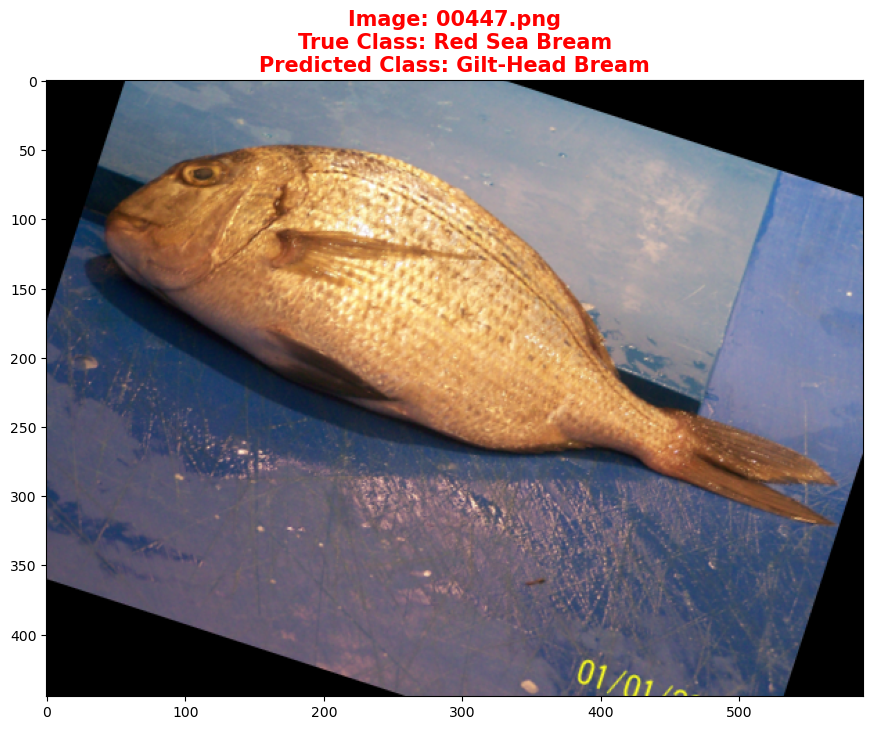

In [19]:
# Display misclassified images
misclassified = pred_df[pred_df['label'] != pred_df['pred']]
if not misclassified.empty:
    idx = misclassified.index[0]  # Pick one misclassified image to display
    plt.figure(figsize=(15,8))
    plt.imshow(plt.imread(pred_df.path[idx]))

    # Extract the image file name (e.g., '00088.png') using os.path
    import os
    title2 = os.path.basename(pred_df.path[idx])  # File name

    # Extract the true class from the directory name (second to last folder)
    title1 = os.path.dirname(pred_df.path[idx]).split(os.sep)[-1]

    # Get the predicted class for the image
    title3 = pred_df.pred[idx]

    plt.title(f'Image: {title2}\nTrue Class: {title1}\nPredicted Class: {title3}', color='r', weight='bold', fontsize=15)
    plt.show()


In [20]:
# Accuracy score
print(f"Accuracy Score: {accuracy_score(pred_df['label'], pred_df['pred'])}")

# Classification report
print(classification_report(pred_df['label'], pred_df['pred']))


Accuracy Score: 0.945
                    precision    recall  f1-score   support

   Black Sea Sprat       0.94      0.97      0.95       195
   Gilt-Head Bream       0.94      0.88      0.91       211
   Hourse Mackerel       0.94      0.98      0.96       179
        Red Mullet       1.00      0.98      0.99       191
     Red Sea Bream       0.99      0.82      0.90       203
          Sea Bass       0.85      0.96      0.90       207
            Shrimp       0.99      0.99      0.99       209
Striped Red Mullet       0.97      0.97      0.97       204
             Trout       0.92      0.98      0.95       201

          accuracy                           0.94      1800
         macro avg       0.95      0.95      0.95      1800
      weighted avg       0.95      0.94      0.94      1800



Epoch 1/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 115s 637ms/step - accuracy: 0.9538 - loss: 0.1346 - val_accuracy: 0.9764 - val_loss: 0.0548
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 113s 628ms/step - accuracy: 0.9638 - loss: 0.0989 - val_accuracy: 0.9819 - val_loss: 0.0558
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 114s 635ms/step - accuracy: 0.9640 - loss: 0.0959 - val_accuracy: 0.9833 - val_loss: 0.0535
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 115s 640ms/step - accuracy: 0.9767 - loss: 0.0709 - val_accuracy: 0.9868 - val_loss: 0.0490
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 115s 637ms/step - accuracy: 0.9721 - loss: 0.0777 - val_accuracy: 0.9750 - val_loss: 0.0781


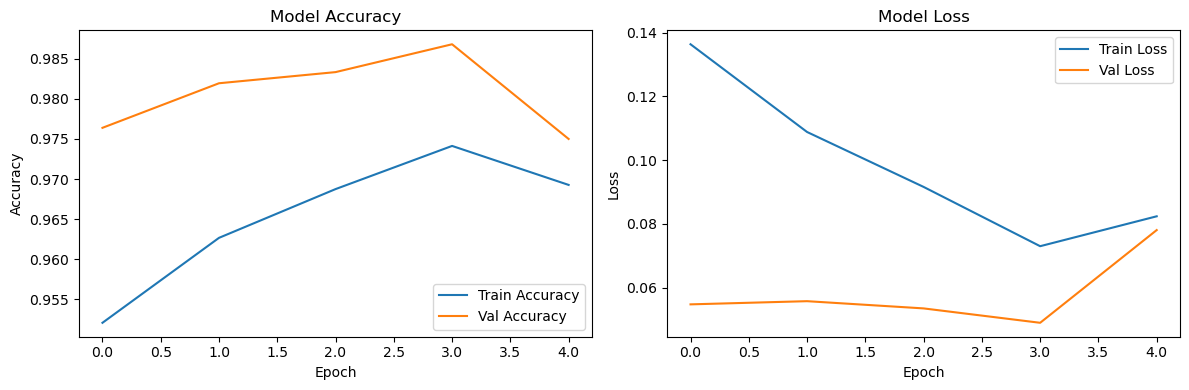

In [24]:
history = model.fit(train_images, validation_data=val_images, epochs=5)
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_training_history(history)
#This function visualizes the training and validation accuracy/loss.
#history.history: Contains training metrics for each epoch.
#plt.plot: Visualizes metrics to analyze model performance over time

In [ ]:
The training accuracy starts high and generally increases over the epochs, 
indicating that the model is learning from the training data.

Both the training loss  and validation loss decrease over the epochs, 
indicating that the model is learning and improving its ability to minimize the loss function.


57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 305ms/step


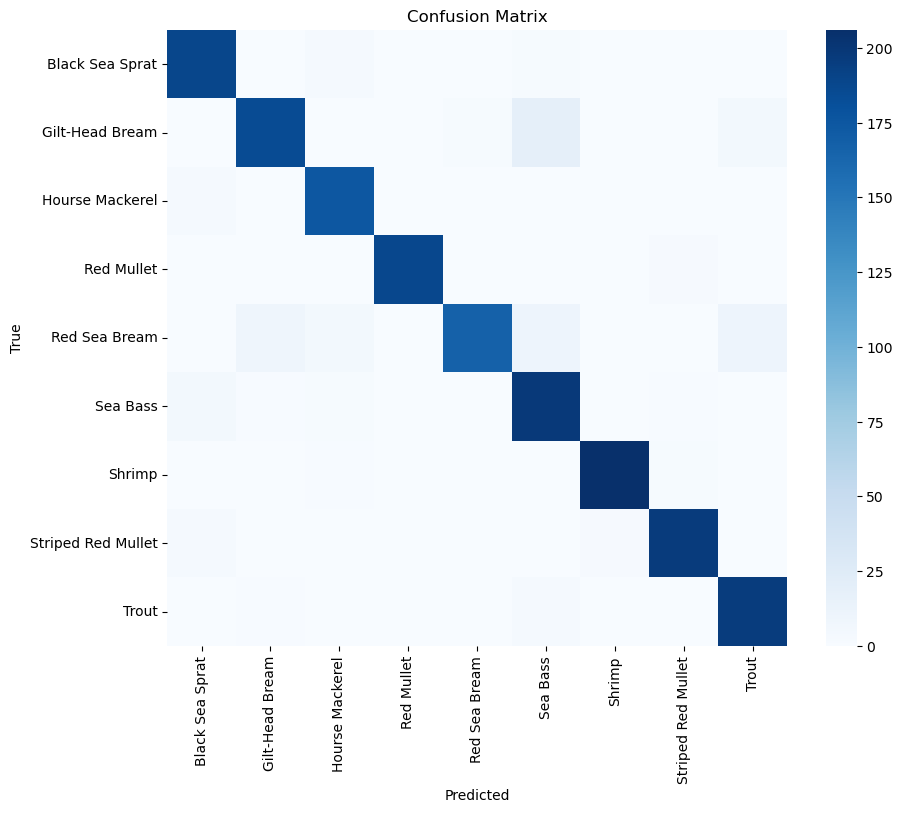

In [33]:
# Assuming you've already predicted your classes
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Convert true classes to numeric labels
true_classes = test_df['label'].values
class_indices = train_images.class_indices
class_labels = {v: k for k, v in class_indices.items()}
true_classes_numeric = np.array([class_indices[label] for label in true_classes])

# Create confusion matrix
conf_matrix = confusion_matrix(true_classes_numeric, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, fmt='d', cmap='Blues', xticklabels=class_labels.values(), yticklabels=class_labels.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


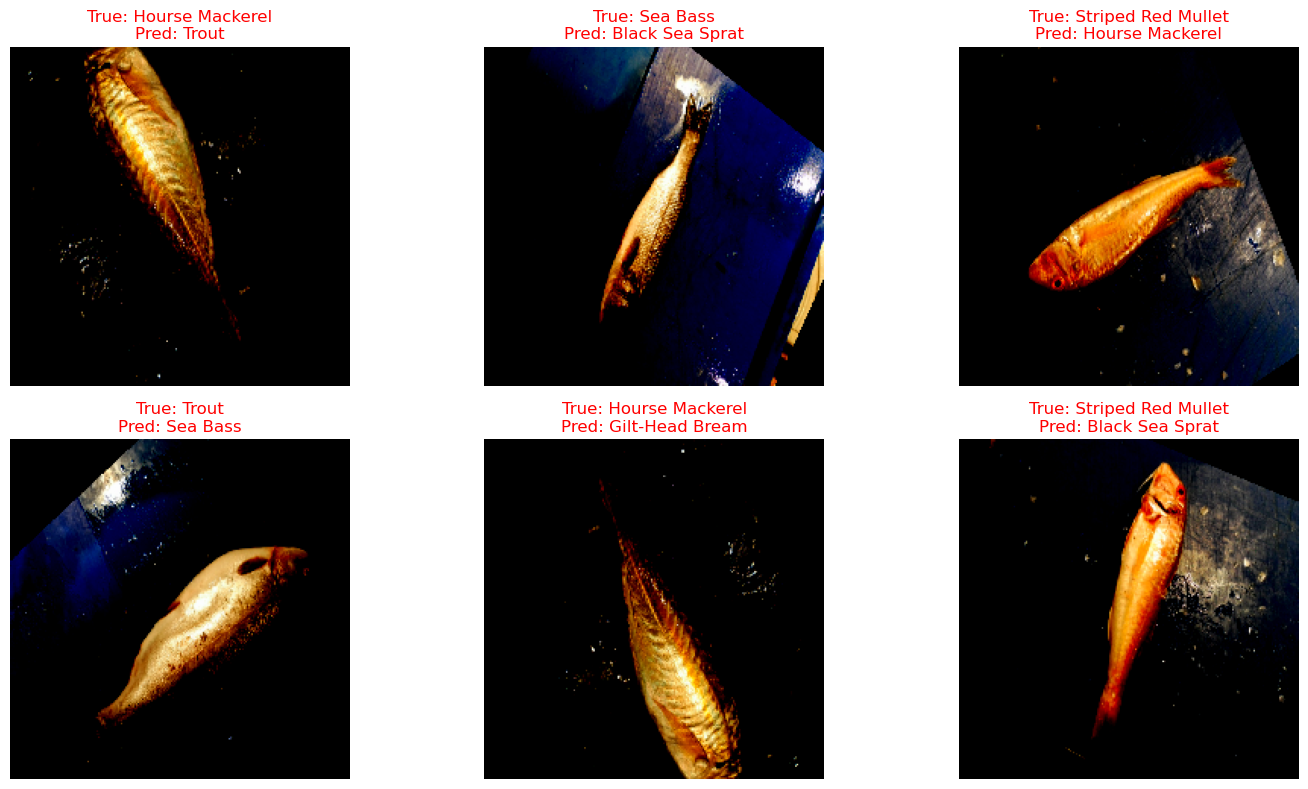

In [22]:
def display_misclassified_images(test_generator, true_classes, predicted_classes, class_indices):
    
    class_labels = {v: k for k, v in class_indices.items()}
    
    # Find misclassified indices
    misclassified_idx = np.where(true_classes != predicted_classes)[0]
    
    if len(misclassified_idx) > 0:
        plt.figure(figsize=(15, 8))
        for i, idx in enumerate(misclassified_idx[:6]):
            # Retrieve the image and label from the generator
            batch_idx = idx // test_generator.batch_size
            image_idx = idx % test_generator.batch_size
            
            # Get the batch of images
            img_batch, _ = test_generator[batch_idx]  # Get the batch
            img = img_batch[image_idx]  # Get the specific image from the batch
            
            plt.subplot(2, 3, i + 1)
            plt.imshow(img)  # Display the image
            
            # Get the true class name and predicted class name
            true_label = class_labels[true_classes[idx]]
            predicted_label = class_labels[predicted_classes[idx]]
            
            # Update the title to show class names
            plt.title(f'True: {true_label}\nPred: {predicted_label}', color='red')
            plt.axis('off')
        plt.tight_layout()
        plt.show()


display_misclassified_images(test_images, true_classes_numeric, predicted_classes, train_images.class_indices)


# TRYING WITH PRE-TRAINED MODELS

In [21]:
import tensorflow as tf

# Load the pre-trained model without the top layer
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

# Freeze the pre-trained model layers to prevent them from being trained
pretrained_model.trainable = False




In [22]:
# Add new fully connected layers on top of the pre-trained model
x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)  # Assuming you have 9 classes

# Create the new model
model1 = tf.keras.Model(inputs=pretrained_model.input, outputs=outputs)

# Summarize the model architecture
model1.summary()

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on your dataset
history1 = model1.fit(train_images,
                      validation_data=val_images,
                      epochs=5)

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,439,625 (9.31 MB)

 Trainable params: 181,641 (709.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 117s 612ms/step - accuracy: 0.8215 - loss: 0.5855 - val_accuracy: 0.9944 - val_loss: 0.0184
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 105s 584ms/step - accuracy: 0.9973 - loss: 0.0129 - val_accuracy: 0.9944 - val_loss: 0.0158
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 108s 599ms/step - accuracy: 0.9998 - loss: 0.0038 - val_accuracy: 0.9708 - val_loss: 0.0817
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 108s 600ms/step - accuracy: 0.9966 - loss: 0.0070 - val_accuracy: 0.9965 - val_loss: 0.0069
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 104s 580ms/step - accuracy: 1.0000 - loss: 6.0407e-04 - val_accuracy: 0.9979 - val_loss: 0.0054


In [23]:
# Evaluate the model on the test dataset
results = model1.evaluate(test_images, verbose=0)

# Print the test loss and accuracy
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))


Test Loss: 0.00343
Test Accuracy: 99.89%


In [24]:
pred1 = model1.predict(test_images)
pred1=np.argmax(pred1,axis=1)
pred_df1=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df1['pred']=pred1
pred_df1['pred']=pred_df1['pred'].apply(lambda x: labels[x])

pred_df1=pred_df1.reset_index(drop=True)
pred_df1.head(10)

57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 433ms/step


path               label  \
0  Downloads/fishdirectory/Fish_Dataset/Fish_Data...  Striped Red Mullet   
1  Downloads/fishdirectory/Fish_Dataset/Fish_Data...     Gilt-Head Bream   
2  Downloads/fishdirectory/Fish_Dataset/Fish_Data...     Black Sea Sprat   
3  Downloads/fishdirectory/Fish_Dataset/Fish_Data...       Red Sea Bream   
4  Downloads/fishdirectory/Fish_Dataset/Fish_Data...               Trout   
5  Downloads/fishdirectory/Fish_Dataset/Fish_Data...               Trout   
6  Downloads/fishdirectory/Fish_Dataset/Fish_Data...            Sea Bass   
7  Downloads/fishdirectory/Fish_Dataset/Fish_Data...               Trout   
8  Downloads/fishdirectory/Fish_Dataset/Fish_Data...          Red Mullet   
9  Downloads/fishdirectory/Fish_Dataset/Fish_Data...       Red Sea Bream   

                 pred  
0  Striped Red Mullet  
1     Gilt-Head Bream  
2     Black Sea Sprat  
3       Red Sea Bream  
4               Trout  
5               Trout  
6            Sea Bass  
7               Trout  
8          Red Mullet  
9       Red Sea Bream

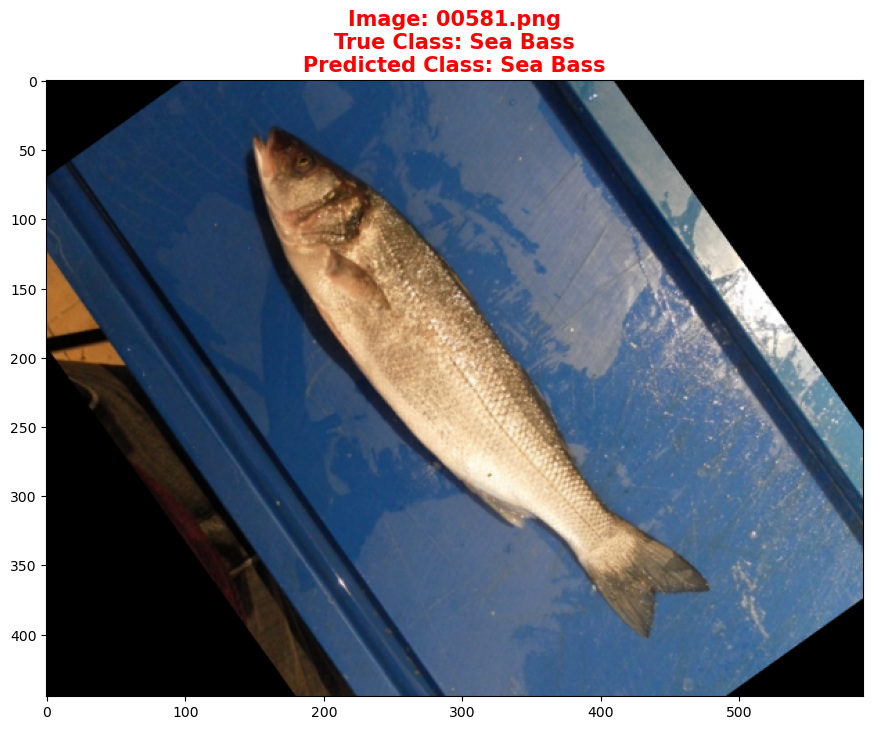

In [25]:
import os

image_path = pred_df1.path[1604]

# Use os.path to extract the components
title1 = os.path.basename(os.path.dirname(image_path))  # True class (folder name)
title2 = os.path.basename(image_path)  # Image filename
title3 = pred_df1.pred[1604]  # Predicted class

plt.figure(figsize=(15, 8))
plt.imshow(plt.imread(image_path))

# Title the image with true class and predicted class
plt.title(f'Image: {title2}\nTrue Class: {title1}\nPredicted Class: {title3}', color='r', weight='bold', fontsize=15)
plt.show()


Accuracy Score: 1.00


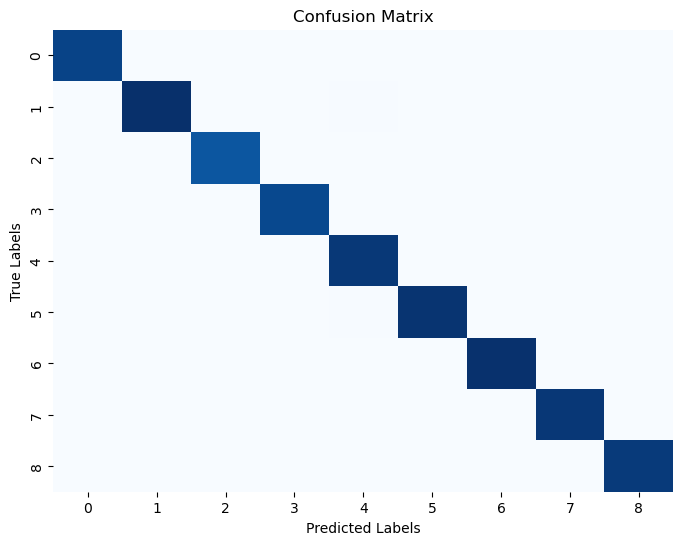

In [34]:
# Accuracy Score
accuracy = accuracy_score(pred_df1['label'], pred_df1['pred'])
print(f"Accuracy Score: {accuracy:.2f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(pred_df1['label'], pred_df1['pred'])
sns.heatmap(cm, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 105s 582ms/step - accuracy: 1.0000 - loss: 3.1929e-04 - val_accuracy: 0.9979 - val_loss: 0.0047
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 106s 587ms/step - accuracy: 1.0000 - loss: 2.4874e-04 - val_accuracy: 0.9979 - val_loss: 0.0051
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 105s 584ms/step - accuracy: 1.0000 - loss: 1.8425e-04 - val_accuracy: 0.9979 - val_loss: 0.0047
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 102s 567ms/step - accuracy: 1.0000 - loss: 1.4513e-04 - val_accuracy: 0.9979 - val_loss: 0.0039
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 111s 614ms/step - accuracy: 1.0000 - loss: 1.2080e-04 - val_accuracy: 0.9979 - val_loss: 0.0039


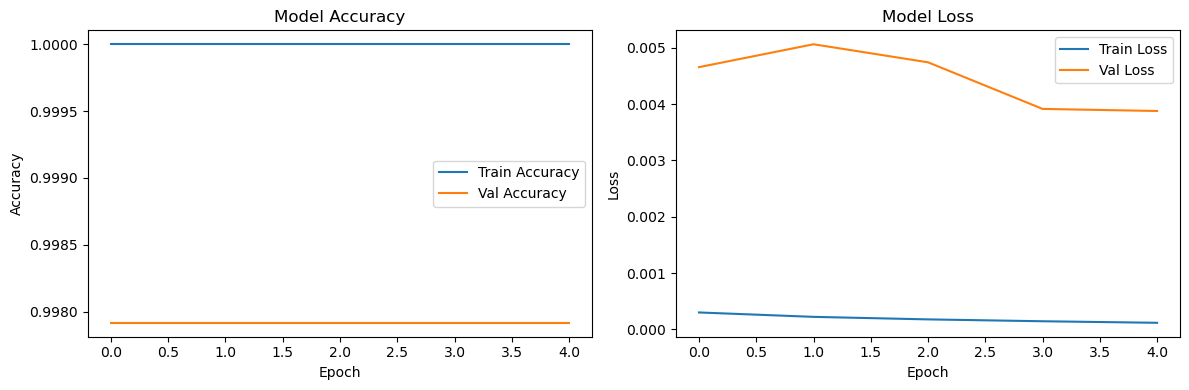

In [32]:
history = model1.fit(train_images, validation_data=val_images, epochs=5)
def plot_training_history1(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_training_history1(history)
#This function visualizes the training and validation accuracy/loss.
#history.history: Contains training metrics for each epoch.
#plt.plot: Visualizes metrics to analyze model performance over time

In [27]:
# Classification Report
report = classification_report(pred_df1['label'], pred_df1['pred'])
print(report)

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       195
   Gilt-Head Bream       1.00      1.00      1.00       211
   Hourse Mackerel       1.00      1.00      1.00       179
        Red Mullet       1.00      1.00      1.00       191
     Red Sea Bream       0.99      1.00      1.00       203
          Sea Bass       1.00      1.00      1.00       207
            Shrimp       1.00      1.00      1.00       209
Striped Red Mullet       1.00      1.00      1.00       204
             Trout       1.00      1.00      1.00       201

          accuracy                           1.00      1800
         macro avg       1.00      1.00      1.00      1800
      weighted avg       1.00      1.00      1.00      1800



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


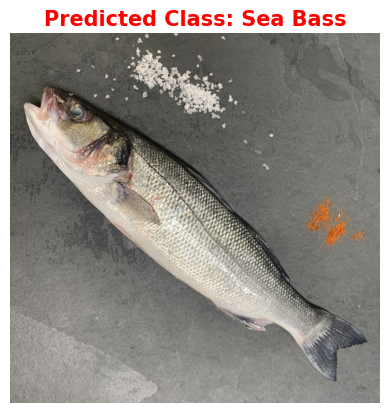

The model predicted the fish as: Sea Bass


In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


# Load and preprocess the external fish image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Match the size used in training
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess as per MobileNetV2
    return img_array

# Predict the class of the new image
def predict_fish_class(model, img_path, labels):
    processed_img = load_and_preprocess_image(img_path)
    prediction = model.predict(processed_img)
    
    # Get the predicted class index
    predicted_index = np.argmax(prediction)
    
    # Get the predicted class name
    predicted_class = labels[predicted_index]
    
    # Display the image and predicted class
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicted Class: {predicted_class}', color='r', weight='bold', fontsize=15)
    plt.axis('off')
    plt.show()
    
    return predicted_class
labels = {
    0: 'Black Sea Sprat',
    1: 'Gilt-Head Bream',
    2: 'Hourse Mackerel',
    3: 'Red Mullet',
    4: 'Red Sea Bream',
    5: 'Sea Bass',
    6: 'Shrimp',
    7: 'Striped Red Mullet',
    8: 'Trout'
}

# Provide the path to the external image
img_path = 'farmed-sea-bass-whole-7-p.jpeg'  # Replace with the path to your fish image


predicted_class = predict_fish_class(model1, img_path, labels)

print(f"The model predicted the fish as: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


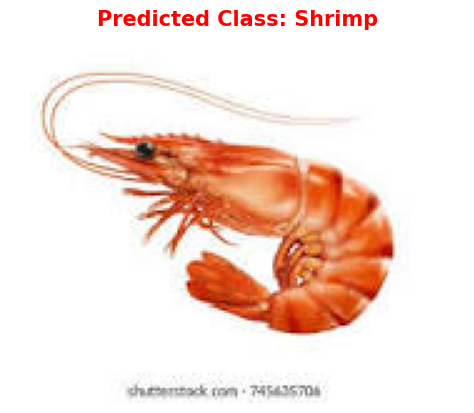

The model predicted the fish as: Shrimp


In [30]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load your model (assuming you have already trained and saved it)
# model1 = tf.keras.models.load_model('path_to_your_saved_model')  # If the model is saved

# Load and preprocess the external fish image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Match the size used in training
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess as per MobileNetV2
    return img_array

# Predict the class of the new image
def predict_fish_class(model, img_path, labels):
    processed_img = load_and_preprocess_image(img_path)
    prediction = model.predict(processed_img)
    
    # Get the predicted class index
    predicted_index = np.argmax(prediction)
    
    # Get the predicted class name
    predicted_class = labels[predicted_index]
    
    # Display the image and predicted class
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicted Class: {predicted_class}', color='r', weight='bold', fontsize=15)
    plt.axis('off')
    plt.show()
    
    return predicted_class

# Define your labels (assuming your 9 classes are in the same order as when the model was trained)
# For example:
labels = {
    0: 'Black Sea Sprat',
    1: 'Gilt-Head Bream',
    2: 'Hourse Mackerel',
    3: 'Red Mullet',
    4: 'Red Sea Bream',
    5: 'Sea Bass',
    6: 'Shrimp',
    7: 'Striped Red Mullet',
    8: 'Trout'
}

# Provide the path to the external image
img_path = 'download (1).jpeg'  # Replace with the path to your fish image

# Predict the class for the new image
predicted_class = predict_fish_class(model1, img_path, labels)

print(f"The model predicted the fish as: {predicted_class}")
